In [111]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
df=pd.read_csv('digital_marketing_campaign_cleaned_dataset.csv')

In [113]:
df.head()

,CustomerID,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Campaign_Channel,Campaign_Type
0,8000,56,0,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1,0.868334,0.855634
1,8001,69,1,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1,0.870263,0.858243
2,8002,46,0,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1,0.882779,0.855634
3,8003,32,0,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1,0.882779,0.933558
4,8004,60,0,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1,0.882779,0.933558


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14024 entries, 0 to 14023
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         14024 non-null  int64  
 1   Age                14024 non-null  int64  
 2   Gender             14024 non-null  int64  
 3   Income             14024 non-null  int64  
 4   AdSpend            14024 non-null  float64
 5   ClickThroughRate   14024 non-null  float64
 6   ConversionRate     14024 non-null  float64
 7   WebsiteVisits      14024 non-null  int64  
 8   PagesPerVisit      14024 non-null  float64
 9   TimeOnSite         14024 non-null  float64
 10  SocialShares       14024 non-null  int64  
 11  EmailOpens         14024 non-null  int64  
 12  EmailClicks        14024 non-null  int64  
 13  PreviousPurchases  14024 non-null  int64  
 14  LoyaltyPoints      14024 non-null  int64  
 15  Conversion         14024 non-null  int64  
 16  Campaign_Channel   140

In [115]:
df.shape

(14024, 18)

In [116]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints', 'Conversion', 'Campaign_Channel', 'Campaign_Type'],
      dtype='object')

In [117]:
df.drop('CustomerID', axis=1, inplace=True)

In [118]:
df[df['Gender']==0]

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Campaign_Channel,Campaign_Type
0,56,0,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1,0.868334,0.855634
2,46,0,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1,0.882779,0.855634
3,32,0,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1,0.882779,0.933558
4,60,0,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1,0.882779,0.933558
5,25,0,42925,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,1,0.868334,0.855634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14016,38,0,23261,1986.867348,0.032089,0.038903,8,5.532023,1.684824,32,17,0,6,2992,0,0.870263,0.858243
14018,65,0,122017,3260.233075,0.031278,0.183338,8,8.183537,9.340926,48,5,3,0,3619,0,0.876774,0.858243
14019,52,0,67404,2360.051856,0.235304,0.166209,12,4.349373,3.237844,67,4,1,7,270,0,0.882779,0.855634
14022,27,0,133049,7922.988158,0.222823,0.068983,17,7.665416,7.896217,69,5,5,4,1280,0,0.876774,0.858243


In [119]:
df[df['WebsiteVisits']==0]

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Campaign_Channel,Campaign_Type
0,56,0,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1,0.868334,0.855634
4,60,0,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1,0.882779,0.933558
93,62,0,77429,7909.335039,0.055027,0.160091,0,4.022981,5.796379,52,11,0,3,3482,1,0.883072,0.855634
123,50,1,105488,5849.412885,0.041662,0.039831,0,9.048246,8.215968,58,2,4,6,2863,1,0.883072,0.855634
132,44,0,54961,8212.720840,0.280320,0.016507,0,9.754429,13.322167,78,5,1,3,3124,1,0.882779,0.933558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13821,36,0,94888,2545.191053,0.219755,0.033704,0,5.024067,1.072979,16,15,0,5,3553,0,0.882779,0.855634
13826,23,1,115018,4119.249182,0.179617,0.046567,0,5.378575,2.041673,20,3,6,9,2124,0,0.882779,0.855634
13863,23,1,115018,4119.249182,0.179617,0.046567,0,5.378575,2.041673,20,3,6,9,2124,0,0.882779,0.855634
13906,42,1,95355,3376.433761,0.235500,0.199710,0,7.066034,1.750996,20,5,3,3,515,0,0.870263,0.855634


In [120]:
df[df['SocialShares']==0]

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Campaign_Channel,Campaign_Type
2,46,0,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1,0.882779,0.855634
71,35,0,144866,6808.222287,0.059465,0.088449,49,3.811545,5.691886,0,8,1,8,3483,1,0.882779,0.855634
229,49,0,146358,4114.616754,0.276653,0.177007,36,8.226682,13.325717,0,11,3,8,2612,1,0.883072,0.855634
292,69,1,35667,8275.587476,0.177480,0.029379,34,5.994822,4.718517,0,3,8,6,1675,1,0.876774,0.855634
345,61,0,50085,1713.502953,0.214448,0.135750,33,1.099476,7.282497,0,10,3,4,46,1,0.876774,0.933558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13557,31,0,149884,3680.878565,0.088405,0.173519,1,2.591519,14.466748,0,15,0,9,1789,0,0.876774,0.855634
13600,34,0,146627,164.410072,0.268090,0.155746,9,6.639601,4.850058,0,8,1,0,3914,0,0.882779,0.858243
13631,43,1,21929,528.305419,0.267237,0.030698,27,2.701065,2.516892,0,1,7,5,1367,0,0.883072,0.858243
13660,57,0,67717,3827.947282,0.086496,0.122334,11,1.281040,1.826137,0,3,4,8,3878,0,0.882779,0.855634


In [121]:
df[df['EmailOpens']==0]

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Campaign_Channel,Campaign_Type
50,43,1,52407,6136.946515,0.140976,0.169108,17,3.124523,13.877085,37,0,2,1,3219,1,0.883072,0.858243
86,33,1,117556,191.273983,0.176307,0.040261,43,9.568801,6.447244,57,0,4,4,3242,1,0.876774,0.855634
89,64,1,26125,3258.038364,0.218565,0.148894,46,5.001441,12.411727,66,0,7,8,2324,1,0.882779,0.933558
98,18,0,144925,3251.440308,0.110701,0.037623,36,9.043198,5.626646,21,0,9,6,4525,1,0.870263,0.855634
139,22,0,105823,225.302025,0.050905,0.152928,27,8.293731,10.020503,43,0,7,9,4579,1,0.882779,0.855634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13966,52,0,41258,831.532238,0.242070,0.161293,5,7.369821,3.285082,17,0,1,4,4465,0,0.883072,0.855634
13993,30,0,68504,5173.822370,0.065076,0.101696,22,1.280593,3.707116,24,0,5,8,4808,0,0.883072,0.855634
13996,67,0,31584,543.784470,0.232599,0.022167,33,2.475001,11.987585,5,0,0,3,2956,0,0.876774,0.855634
14002,42,0,31004,4592.279828,0.050120,0.087405,3,2.536159,6.995450,24,0,8,9,4691,0,0.883072,0.858243


In [122]:
df[df['EmailClicks']==0]

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Campaign_Channel,Campaign_Type
20,47,0,119233,8333.232297,0.257696,0.011249,36,9.691906,1.470518,63,14,0,5,2586,1,0.876774,0.855634
33,32,0,127960,3147.152746,0.216414,0.147139,14,8.667309,14.715811,3,10,0,1,2429,1,0.882779,0.855634
37,69,1,141835,3360.961909,0.130968,0.156088,20,1.700094,1.174959,1,13,0,0,2885,1,0.883072,0.933558
45,21,0,114240,2625.652010,0.282608,0.148780,11,6.172143,13.332237,41,19,0,7,883,1,0.883072,0.855634
93,62,0,77429,7909.335039,0.055027,0.160091,0,4.022981,5.796379,52,11,0,3,3482,1,0.883072,0.855634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13982,58,0,125148,8867.640616,0.125750,0.180736,47,7.357534,10.678000,64,6,0,2,199,0,0.868334,0.855634
13996,67,0,31584,543.784470,0.232599,0.022167,33,2.475001,11.987585,5,0,0,3,2956,0,0.876774,0.855634
13998,29,0,29934,5772.493796,0.289013,0.018258,10,1.894220,5.612284,48,12,0,1,2374,0,0.870263,0.855634
14008,19,0,112712,291.632201,0.281464,0.112435,8,5.159251,4.319965,43,5,0,0,4303,0,0.868334,0.855634


In [123]:
df[df['PreviousPurchases']==0]

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Campaign_Channel,Campaign_Type
3,32,0,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1,0.882779,0.933558
5,25,0,42925,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,1,0.868334,0.855634
7,56,0,57083,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,1,0.868334,0.933558
29,44,1,107973,4363.889775,0.283453,0.166306,12,9.290457,9.367495,38,12,6,0,911,1,0.883072,0.855634
37,69,1,141835,3360.961909,0.130968,0.156088,20,1.700094,1.174959,1,13,0,0,2885,1,0.883072,0.933558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14006,41,1,126634,976.353442,0.051528,0.021740,14,2.587112,13.645358,23,5,6,0,3615,0,0.883072,0.933558
14008,19,0,112712,291.632201,0.281464,0.112435,8,5.159251,4.319965,43,5,0,0,4303,0,0.868334,0.855634
14012,35,0,44459,4387.127659,0.012906,0.031879,2,7.309399,13.438111,60,1,5,0,4571,0,0.868334,0.855634
14014,18,1,51571,948.662875,0.147776,0.044974,6,2.379107,8.019550,46,15,4,0,536,0,0.882779,0.858243


In [124]:
df[df['LoyaltyPoints']==0]

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Campaign_Channel,Campaign_Type
3445,40,0,89563,6154.727911,0.016424,0.157639,28,4.236474,13.642281,36,2,3,9,0,1,0.876774,0.855634
6755,31,0,48082,1156.745977,0.062732,0.012350,34,5.384336,9.856400,66,6,2,8,0,1,0.868334,0.855634
6946,41,0,36838,1725.916645,0.265537,0.116134,30,9.912866,10.865389,68,16,8,4,0,1,0.870263,0.855634
8884,19,0,117486,3676.044527,0.223104,0.046248,31,4.446775,2.280835,28,1,6,2,0,0,0.883072,0.855634
10173,19,0,117486,3676.044527,0.223104,0.046248,31,4.446775,2.280835,28,1,6,2,0,0,0.883072,0.855634
10210,19,0,117486,3676.044527,0.223104,0.046248,31,4.446775,2.280835,28,1,6,2,0,0,0.883072,0.855634
10746,19,0,117486,3676.044527,0.223104,0.046248,31,4.446775,2.280835,28,1,6,2,0,0,0.883072,0.855634
11365,19,0,117486,3676.044527,0.223104,0.046248,31,4.446775,2.280835,28,1,6,2,0,0,0.883072,0.855634
11380,19,0,117486,3676.044527,0.223104,0.046248,31,4.446775,2.280835,28,1,6,2,0,0,0.883072,0.855634
13693,19,0,117486,3676.044527,0.223104,0.046248,31,4.446775,2.280835,28,1,6,2,0,0,0.883072,0.855634


In [125]:
df['Gender'] = df['Gender'].replace(0,df['Gender'].mean())
df['WebsiteVisits'] = df['WebsiteVisits'].replace(0,df['WebsiteVisits'].mean())
df['SocialShares'] = df['SocialShares'].replace(0,df['SocialShares'].mean())
df['EmailOpens'] = df['EmailOpens'].replace(0,df['EmailOpens'].mean())
df['EmailClicks'] = df['EmailClicks'].replace(0,df['EmailClicks'].mean())
df['PreviousPurchases'] = df['PreviousPurchases'].replace(0,df['PreviousPurchases'].mean())
df['LoyaltyPoints'] = df['LoyaltyPoints'].replace(0,df['LoyaltyPoints'].mean())


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14024 entries, 0 to 14023
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                14024 non-null  int64  
 1   Gender             14024 non-null  float64
 2   Income             14024 non-null  int64  
 3   AdSpend            14024 non-null  float64
 4   ClickThroughRate   14024 non-null  float64
 5   ConversionRate     14024 non-null  float64
 6   WebsiteVisits      14024 non-null  float64
 7   PagesPerVisit      14024 non-null  float64
 8   TimeOnSite         14024 non-null  float64
 9   SocialShares       14024 non-null  float64
 10  EmailOpens         14024 non-null  float64
 11  EmailClicks        14024 non-null  float64
 12  PreviousPurchases  14024 non-null  float64
 13  LoyaltyPoints      14024 non-null  float64
 14  Conversion         14024 non-null  int64  
 15  Campaign_Channel   14024 non-null  float64
 16  Campaign_Type      140

In [127]:
df.columns

Index(['Age', 'Gender', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints', 'Conversion', 'Campaign_Channel', 'Campaign_Type'],
      dtype='object')

In [128]:
X=df.drop('Conversion', axis=1)
y=df['Conversion']

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [130]:
X_train.shape, X_test.shape


((10518, 16), (3506, 16))

In [131]:
X_train.corr()

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Campaign_Channel,Campaign_Type
Age,1.000000,-0.000628,0.018748,0.001699,0.012039,0.012237,-0.004618,-0.028146,-0.023247,-0.003524,0.028147,-0.027069,-0.013371,0.001854,0.016475,0.021567
Gender,-0.000628,1.000000,-0.037422,0.023139,-0.001098,0.001311,0.010746,-0.023314,0.014948,-0.007757,-0.042461,0.004157,0.010175,0.010902,0.005597,0.000377
Income,0.018748,-0.037422,1.000000,-0.009943,0.013595,0.018066,-0.022856,0.014408,0.028577,0.024362,0.019646,0.011640,-0.015260,0.029095,0.024110,-0.001724
AdSpend,0.001699,0.023139,-0.009943,1.000000,-0.002540,0.019307,0.040911,0.037490,0.042661,-0.050378,0.041320,0.046627,0.006893,0.023167,0.005346,0.034634
ClickThroughRate,0.012039,-0.001098,0.013595,-0.002540,1.000000,0.013058,-0.018513,0.025411,0.004745,0.008544,0.002214,-0.006750,0.013173,-0.020961,-0.002486,0.039894
ConversionRate,0.012237,0.001311,0.018066,0.019307,0.013058,1.000000,0.015570,0.037047,0.035017,0.016606,-0.006165,0.015306,-0.006479,0.021242,-0.016404,0.033192
WebsiteVisits,-0.004618,0.010746,-0.022856,0.040911,-0.018513,0.015570,1.000000,-0.001871,-0.009131,-0.023481,0.013427,0.021606,0.020720,0.003658,-0.009434,0.009961
PagesPerVisit,-0.028146,-0.023314,0.014408,0.037490,0.025411,0.037047,-0.001871,1.000000,0.051717,0.000627,0.029250,0.025586,-0.010546,-0.001126,-0.003042,0.025075
TimeOnSite,-0.023247,0.014948,0.028577,0.042661,0.004745,0.035017,-0.009131,0.051717,1.000000,-0.002936,0.030431,0.022588,0.002139,-0.012614,-0.009908,0.066566
SocialShares,-0.003524,-0.007757,0.024362,-0.050378,0.008544,0.016606,-0.023481,0.000627,-0.002936,1.000000,-0.019724,-0.022791,0.000344,0.016927,-0.017283,0.003575


<Axes: >

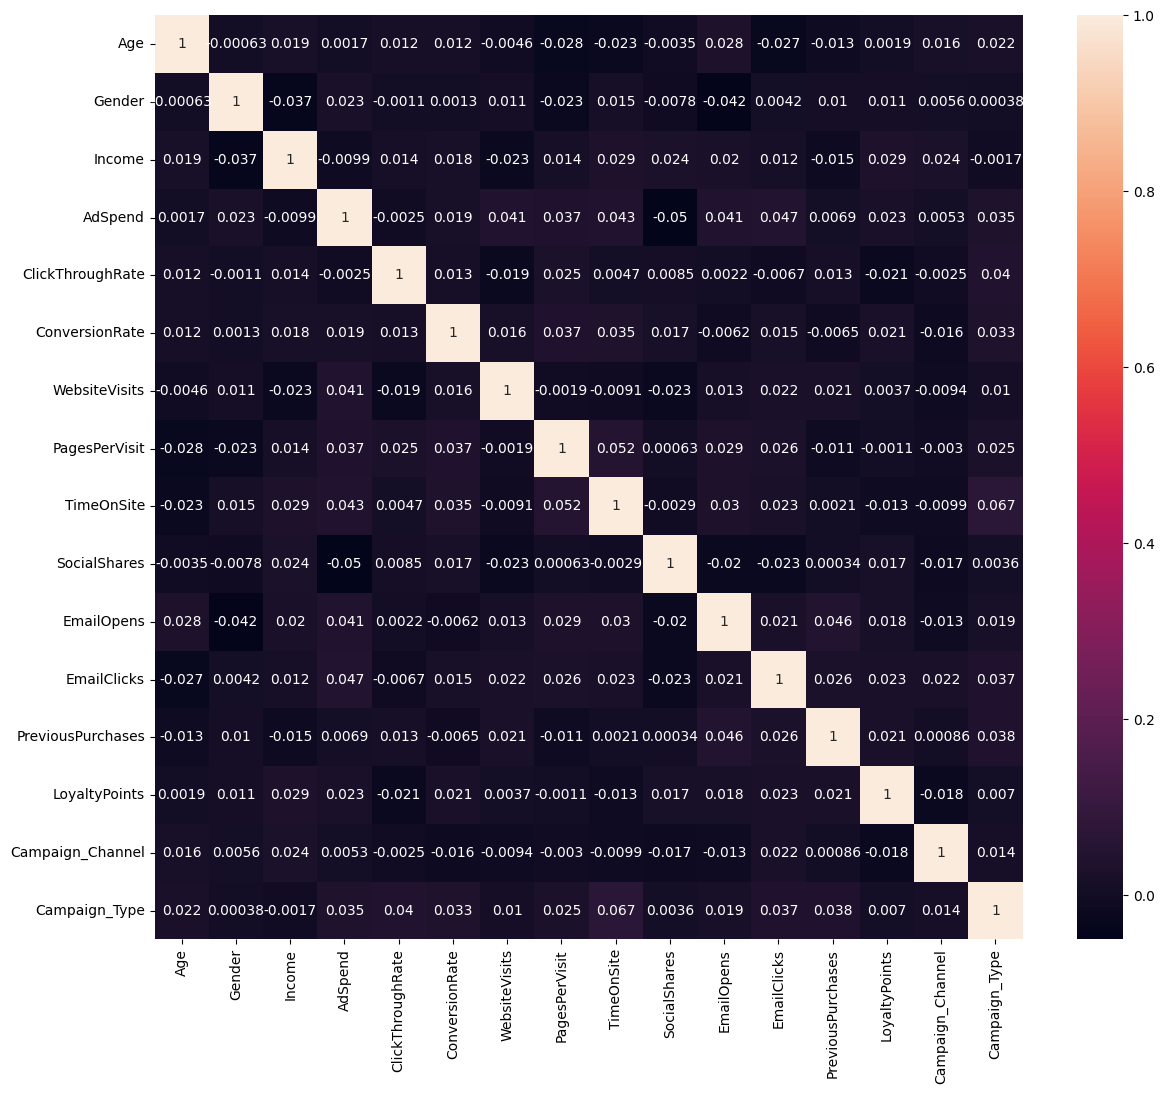

In [132]:
plt.figure(figsize=(14,12))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [133]:
from sklearn.preprocessing import StandardScaler


In [134]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [135]:
scaler

StandardScaler()

In [136]:
X_train_scaled

array([[ 0.62432074,  1.2274661 ,  0.61821776, ..., -1.26545405,
        -1.3143563 , -0.53418293],
       [ 0.22463285, -0.81468645, -1.34633433, ..., -1.21817441,
        -0.99895712, -0.45024554],
       [ 1.35708186,  1.2274661 ,  1.55839419, ...,  0.11387816,
         1.04758982,  1.9721909 ],
       ...,
       [-1.70719193, -0.81468645, -1.25646706, ...,  0.07756191,
         1.09535142, -0.53418293],
       [ 0.02478891,  1.2274661 , -0.73093024, ...,  0.64080636,
         1.04758982, -0.53418293],
       [ 0.1580182 ,  1.2274661 , -0.44096062, ..., -0.52131357,
         1.09535142,  1.9721909 ]], shape=(10518, 16))

In [137]:
X_test_scaled

array([[-0.90781616, -0.81468645,  1.62437101, ..., -0.07661084,
         0.06565271, -0.53418293],
       [-0.77458686, -0.81468645,  0.57025147, ...,  1.4109849 ,
         1.09535142, -0.53418293],
       [-1.1076601 , -0.81468645, -1.22844479, ...,  1.41167011,
         1.04758982, -0.45024554],
       ...,
       [ 0.69093538, -0.81468645, -0.50097808, ..., -0.63574402,
         1.04758982,  1.9721909 ],
       [-0.30828433,  1.2274661 ,  1.4982443 , ...,  0.37494402,
        -1.3143563 , -0.53418293],
       [-0.77458686,  1.2274661 , -0.80347561, ...,  1.66999512,
         1.09535142, -0.45024554]], shape=(3506, 16))

In [138]:
file_path = r'D:\Data Science\marketing_project\models\standardscalar.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(scaler, file)


In [139]:
X_train_scaled

array([[ 0.62432074,  1.2274661 ,  0.61821776, ..., -1.26545405,
        -1.3143563 , -0.53418293],
       [ 0.22463285, -0.81468645, -1.34633433, ..., -1.21817441,
        -0.99895712, -0.45024554],
       [ 1.35708186,  1.2274661 ,  1.55839419, ...,  0.11387816,
         1.04758982,  1.9721909 ],
       ...,
       [-1.70719193, -0.81468645, -1.25646706, ...,  0.07756191,
         1.09535142, -0.53418293],
       [ 0.02478891,  1.2274661 , -0.73093024, ...,  0.64080636,
         1.04758982, -0.53418293],
       [ 0.1580182 ,  1.2274661 , -0.44096062, ..., -0.52131357,
         1.09535142,  1.9721909 ]], shape=(10518, 16))

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [142]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}


In [143]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [144]:
clf.best_params_

{'C': np.float64(1.0), 'penalty': 'l2', 'solver': 'liblinear'}

In [145]:
clf.best_score_

np.float64(0.7123981144157475)

In [146]:
y_pred = clf.predict(X_test_scaled)

In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [148]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat


array([[1268,  465],
       [ 557, 1216]])

In [149]:
print(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.708499714774672
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1733
           1       0.72      0.69      0.70      1773

    accuracy                           0.71      3506
   macro avg       0.71      0.71      0.71      3506
weighted avg       0.71      0.71      0.71      3506



In [150]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [151]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

np.float64(0.708499714774672)

In [152]:
Precision = true_positive/(true_positive+false_positive)
Precision

np.float64(0.7316791690709752)

In [153]:
Recall = true_positive/(true_positive+false_negative)
Recall

np.float64(0.6947945205479452)

In [154]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

np.float64(0.7127599775154583)

In [155]:
import pickle
file = open('D:\Data Science\marketing_project\models\modelForPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()

In [102]:
## KNN classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
classifier=KNeighborsClassifier(n_neighbors=5, algorithm='auto')
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred=classifier.predict(X_test_scaled)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [46]:
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
      

[[   0    0]
 [1733 1773]]
0.5057045065601825
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.51      0.67      3506

    accuracy                           0.51      3506
   macro avg       0.50      0.25      0.34      3506
weighted avg       1.00      0.51      0.67      3506



In [47]:
# KNN REGRESSOR

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
regressor=KNeighborsRegressor(n_neighbors=6, algorithm='auto')
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [50]:
y_predt=regressor.predict(X_test_scaled)

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [52]:
print(r2_score( y_test,y_predt))
print(mean_absolute_error( y_test,y_predt))
print(mean_squared_error(y_test,y_predt))
      

-0.00013018252566454613
0.5
0.25


In [53]:
# DECISION TREE

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [55]:
X_train.corr()

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Campaign_Channel,Campaign_Type
Age,1.000000,-0.004498,0.015007,-0.000387,0.014624,0.014676,-0.003693,-0.019514,-0.033911,-0.001355,0.016505,-0.023254,-0.022262,0.009902,0.012322,0.015088
Gender,-0.004498,1.000000,-0.027533,0.015979,0.000035,-0.000310,0.007964,-0.020043,0.003253,-0.004655,-0.044067,0.002389,0.000895,0.005008,0.010217,-0.007325
Income,0.015007,-0.027533,1.000000,0.002740,0.008277,0.023957,-0.014303,0.017246,0.025189,0.014796,0.017731,0.011431,-0.010571,0.027001,0.006990,0.015263
AdSpend,-0.000387,0.015979,0.002740,1.000000,-0.001388,0.014544,0.042034,0.031589,0.040864,-0.036032,0.026446,0.047392,0.010442,0.028524,0.008770,0.030706
ClickThroughRate,0.014624,0.000035,0.008277,-0.001388,1.000000,0.013204,-0.025765,0.025838,0.003268,0.006992,0.005509,0.004427,0.007053,-0.020417,-0.006981,0.043987
ConversionRate,0.014676,-0.000310,0.023957,0.014544,0.013204,1.000000,0.014342,0.040617,0.028548,0.019697,-0.008884,0.011458,-0.002955,0.013198,-0.017479,0.032452
WebsiteVisits,-0.003693,0.007964,-0.014303,0.042034,-0.025765,0.014342,1.000000,-0.006241,-0.006996,-0.023215,0.013334,0.018202,0.019818,0.011710,-0.008198,0.003488
PagesPerVisit,-0.019514,-0.020043,0.017246,0.031589,0.025838,0.040617,-0.006241,1.000000,0.049036,0.015703,0.031784,0.034550,-0.009372,0.008157,-0.000690,0.017453
TimeOnSite,-0.033911,0.003253,0.025189,0.040864,0.003268,0.028548,-0.006996,0.049036,1.000000,0.007707,0.032550,0.022731,0.000101,-0.006378,-0.006505,0.069774
SocialShares,-0.001355,-0.004655,0.014796,-0.036032,0.006992,0.019697,-0.023215,0.015703,0.007707,1.000000,-0.014437,-0.022741,-0.004522,0.008646,-0.016035,0.003312


In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [57]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_dtscaled = scaler.fit_transform(X_train)
    X_test_dtscaled = scaler.transform(X_test)
    
    #saving the model
    file = open('D:\Data Science\marketing_project\models\standardScalardt.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_dtscaled, X_test_dtscaled

In [58]:
X_train_dtscaled, X_test_dtscaled = scaler_standard(X_train, X_test)

In [59]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
param={
    'criterion':['squared_error','frieman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [61]:
param

{'criterion': ['squared_error', 'frieman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
regressor=DecisionTreeRegressor()

In [64]:
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [65]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'frieman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [66]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 25,
 'max_features': 'log2',
 'splitter': 'best'}

In [67]:
selectmodel=DecisionTreeRegressor(criterion= 'squared_error', max_depth= 20,max_features= 'sqrt',splitter= 'best')

In [68]:
selectmodel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, max_features='sqrt')

[Text(0.3539621277996477, 0.9761904761904762, 'x[7] <= 3.022\nsquared_error = 0.25\nsamples = 10518\nvalue = 0.504'),
 Text(0.18382686673137763, 0.9285714285714286, 'x[11] <= 4.522\nsquared_error = 0.221\nsamples = 3142\nvalue = 0.33'),
 Text(0.2688944972655127, 0.9523809523809523, 'True  '),
 Text(0.1019939063848145, 0.8809523809523809, 'x[3] <= 4994.195\nsquared_error = 0.188\nsamples = 1956\nvalue = 0.25'),
 Text(0.06924521857923498, 0.8333333333333334, 'x[15] <= 0.896\nsquared_error = 0.137\nsamples = 1235\nvalue = 0.164'),
 Text(0.03437769628990509, 0.7857142857142857, 'x[5] <= 0.07\nsquared_error = 0.11\nsamples = 1012\nvalue = 0.125'),
 Text(0.021570319240724764, 0.7380952380952381, 'x[9] <= 98.5\nsquared_error = 0.059\nsamples = 448\nvalue = 0.062'),
 Text(0.020419902214552775, 0.6904761904761905, 'x[8] <= 14.742\nsquared_error = 0.057\nsamples = 447\nvalue = 0.06'),
 Text(0.01926948518838079, 0.6428571428571429, 'x[14] <= 0.883\nsquared_error = 0.055\nsamples = 446\nvalue = 0.

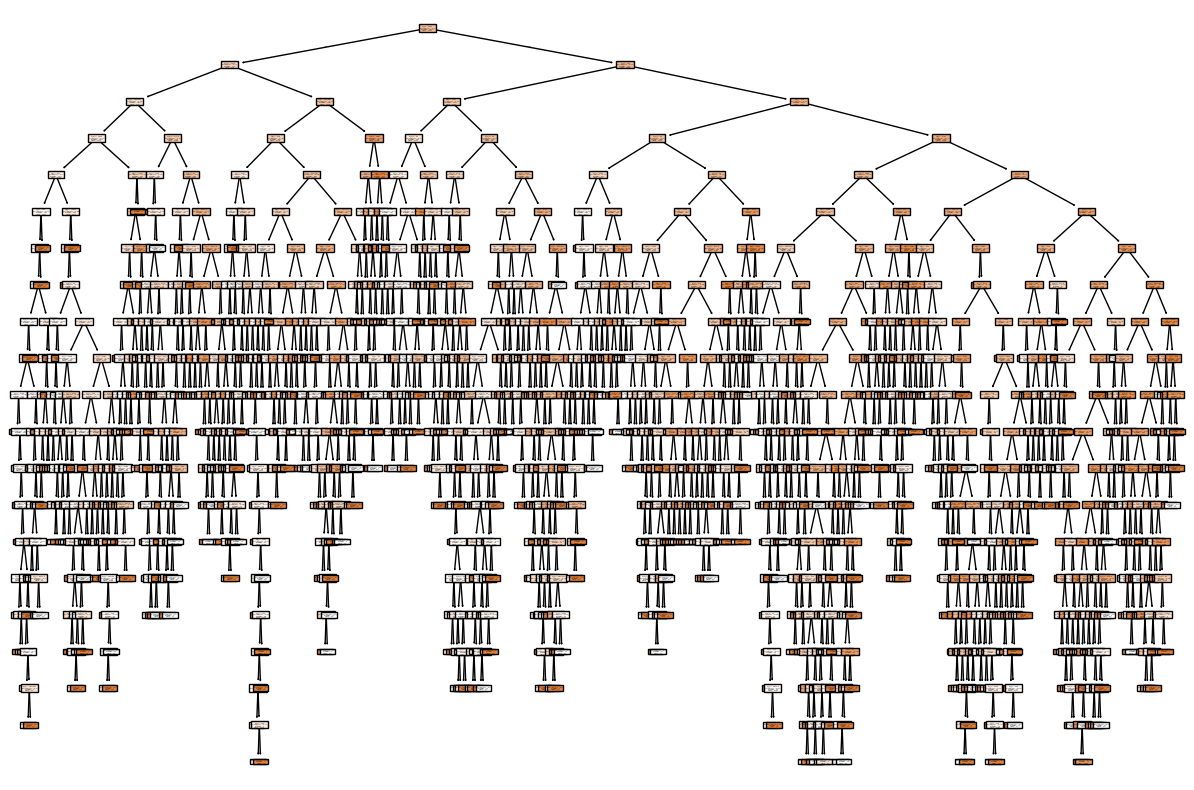

In [69]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel,filled=True)

In [70]:

y_predict=grid.predict(X_test_dtscaled)

In [71]:
print(r2_score( y_test,y_predict))
print(mean_absolute_error( y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
      

-1.0514921006436508
0.5125499144324016
0.5125499144324016


In [72]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [73]:
import warnings
warnings.filterwarnings('ignore')
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [74]:
parameter

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [75]:
clf=GridSearchCV(classifier,param_grid=parameter,cv=3,scoring='accuracy',verbose=3)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.605 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.602 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, sco

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [76]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [77]:
classifier=DecisionTreeClassifier(criterion='gini',max_depth= 5,max_features='sqrt',splitter='best')

In [78]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt')

In [79]:
## Support Vector Classifier With Hyperparameter Tuning

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

In [80]:
from sklearn.svm import SVC

In [81]:
gridcl=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=3,verbose=3,scoring='accuracy')

gridcl.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   4.6s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   4.5s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   4.5s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   4.7s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   4.7s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   4.5s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.507 total time=   4.6s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.507 total time=   4.4s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.507 total time=   4.4s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   4.4s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   4.3s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [82]:
gridcl.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [87]:
svc_clf=SVC(C=1,gamma=1,kernel='rbf')
svc_clf.fit(X_train,y_train)

SVC(C=1, gamma=1)

In [88]:

y_predcl = classifier.predict(X_test_dtscaled)

In [89]:
## SVC prediction
y_pred_svc = svc_clf.predict(X_test_dtscaled)

In [90]:
conf_mat = confusion_matrix(y_test,y_predcl)
conf_mat

array([[1659,  138],
       [1493,  216]])

In [91]:
conf_mat = confusion_matrix(y_test,y_pred_svc)
conf_mat

array([[   0, 1797],
       [   0, 1709]])

In [97]:
print(accuracy_score(y_test,y_predcl))

print(classification_report(y_test,y_predcl))

0.5347974900171135
              precision    recall  f1-score   support

           0       0.53      0.92      0.67      1797
           1       0.61      0.13      0.21      1709

    accuracy                           0.53      3506
   macro avg       0.57      0.52      0.44      3506
weighted avg       0.57      0.53      0.45      3506



In [99]:
print(accuracy_score(y_test,y_pred_svc))

print(classification_report(y_test,y_pred_svc))

0.4874500855675984
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1797
           1       0.49      1.00      0.66      1709

    accuracy                           0.49      3506
   macro avg       0.24      0.50      0.33      3506
weighted avg       0.24      0.49      0.32      3506

